# Lab | Data Aggregation and Filtering

In this challenge, we will continue to work with customer data from an insurance company. We will use the dataset called marketing_customer_analysis.csv, which can be found at the following link:

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/marketing_customer_analysis.csv

This dataset contains information such as customer demographics, policy details, vehicle information, and the customer's response to the last marketing campaign. Our goal is to explore and analyze this data by first performing data cleaning, formatting, and structuring.

1. Create a new DataFrame that only includes customers who have a total_claim_amount greater than $1,000 and have a response of "Yes" to the last marketing campaign.

In [3]:
# Create a new DataFrame that only includes customers who have a total_claim_amount greater than $1,000 and have a response of "Yes" to the last marketing campaign.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv('https://raw.githubusercontent.com/data-bootcamp-v4/data/main/marketing_customer_analysis.csv')
df.head()

,Unnamed: 0,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN


       unnamed:_0 customer       state  customer_lifetime_value response  \
189           189  OK31456  California             11009.130490      Yes   
236           236  YJ16163      Oregon             11009.130490      Yes   
419           419  GW43195      Oregon             25807.063000      Yes   
442           442  IP94270     Arizona             13736.132500      Yes   
587           587  FJ28407  California              5619.689084      Yes   
...           ...      ...         ...                      ...      ...   
10351       10351  FN44127      Oregon              3508.569533      Yes   
10373       10373  XZ64172      Oregon             10963.957230      Yes   
10487       10487  IX60941      Oregon              3508.569533      Yes   
10565       10565  QO62792      Oregon              7840.165778      Yes   
10708       10708  CK39096      Oregon              5619.689084      Yes   

       coverage             education effective_to_date employment_status  \
189     Pr

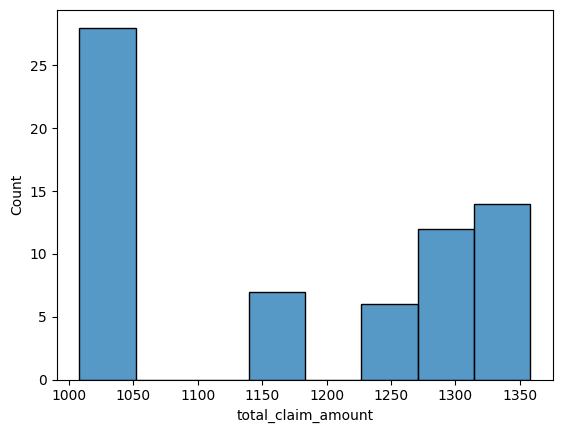

In [7]:
# clean the data change all names to lower case and replace spaces with underscores
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.head()

# Now change the employemnetsstatus to employment_status
df = df.rename(columns={'employmentstatus': 'employment_status'})
df.head()

# Filter the data
filtered_df = df[(df['total_claim_amount'] > 1000) & (df['response'] == 'Yes')]
print(filtered_df)
filtered_df.to_csv('filtered_data.csv')

# Plot the data
sns.histplot(filtered_df['total_claim_amount'])
plt.show()

2. Using the original Dataframe, analyze the average total_claim_amount by each policy type and gender for customers who have responded "Yes" to the last marketing campaign. Write your conclusions.

       unnamed:_0 customer       state  customer_lifetime_value response  \
3               3  XL78013      Oregon             22332.439460      Yes   
8               8  FM55990  California              5989.773931      Yes   
15             15  CW49887  California              4626.801093      Yes   
19             19  NJ54277  California              3746.751625      Yes   
27             27  MQ68407      Oregon              4376.363592      Yes   
...           ...      ...         ...                      ...      ...   
10844       10844  FM31768     Arizona              5979.724161      Yes   
10852       10852  KZ80424  Washington              8382.478392      Yes   
10872       10872  XT67997  California              5979.724161      Yes   
10887       10887  BY78730      Oregon              8879.790017      Yes   
10897       10897  MM70762     Arizona              9075.768214      Yes   

       coverage             education effective_to_date employment_status  \
3      Ext

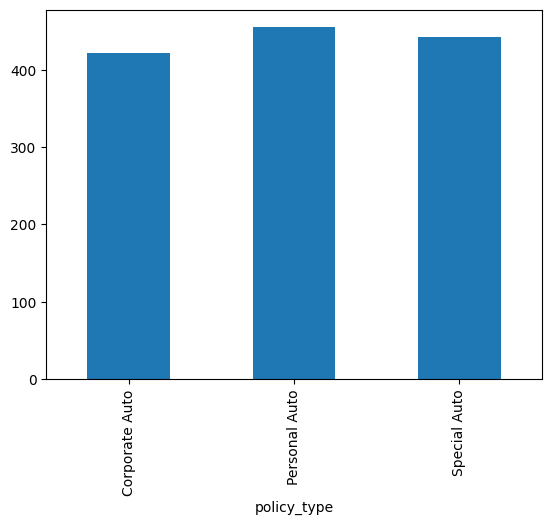

In [10]:
# Using the original Dataframe, analyze the average total_claim_amount by each policy type and gender for customers who have responded "Yes" to the last marketing campaign. Write your conclusions.

# Filter the data
filtered_df = df[(df['response'] == 'Yes')]
print(filtered_df)

# Group the data
# Filter the data
grouped = filtered_df.groupby(['policy_type'])['total_claim_amount'].mean()

# Plot the data
grouped.plot(kind='bar')
plt.show()





3. Analyze the total number of customers who have policies in each state, and then filter the results to only include states where there are more than 500 customers.

state
Arizona       1937
California    3552
Nevada         993
Oregon        2909
Washington     888
Name: customer, dtype: int64
state
Arizona       1937
California    3552
Nevada         993
Oregon        2909
Washington     888
Name: customer, dtype: int64


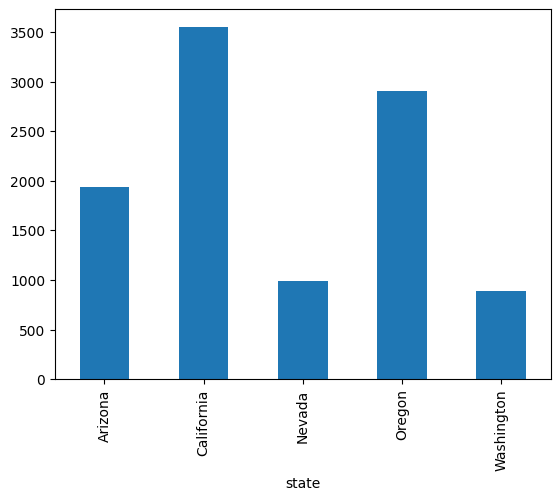

In [11]:
# Analyze the total number of customers who have policies in each state, and then filter the results to only include states where there are more than 500 customers.
# Group the data
grouped = df.groupby(['state'])['customer'].count()
print(grouped)

# Filter the data
filtered = grouped[grouped > 500]
print(filtered)

# Plot the data
filtered.plot(kind='bar')
plt.show()


4. Find the maximum, minimum, and median customer lifetime value by education level and gender. Write your conclusions.

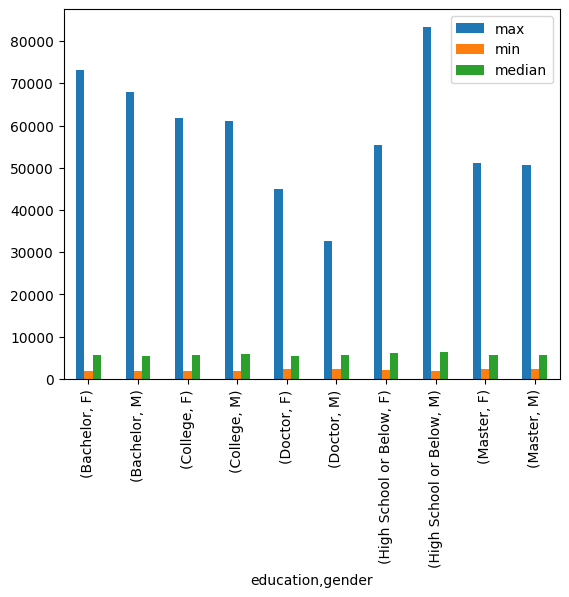

In [14]:
grouped = df.groupby(['education', 'gender'])['customer_lifetime_value'].agg(['max', 'min', 'median'])

grouped.plot(kind='bar')

plt.show()

                    



## Bonus

5. The marketing team wants to analyze the number of policies sold by state and month. Present the data in a table where the months are arranged as columns and the states are arranged as rows.

       unnamed:_0 customer       state  customer_lifetime_value response  \
0               0  DK49336     Arizona              4809.216960       No   
1               1  KX64629  California              2228.525238       No   
2               2  LZ68649  Washington             14947.917300       No   
3               3  XL78013      Oregon             22332.439460      Yes   
4               4  QA50777      Oregon              9025.067525       No   
...           ...      ...         ...                      ...      ...   
10905       10905  FE99816      Nevada             15563.369440       No   
10906       10906  KX53892      Oregon              5259.444853       No   
10907       10907  TL39050     Arizona             23893.304100       No   
10908       10908  WA60547  California             11971.977650       No   
10909       10909  IV32877         NaN              6857.519928      NaN   

       coverage education effective_to_date employment_status gender  ...  \
0         

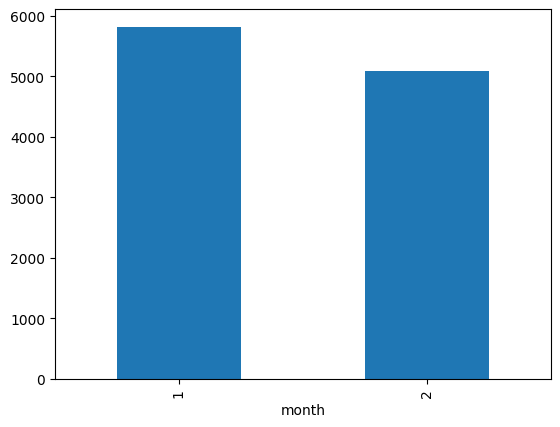

In [18]:
# extract month from date
df['month'] = pd.DatetimeIndex(df['effective_to_date']).month
print(df)

# Group the data
grouped = df.groupby(['month'])['customer'].count()
print(grouped)

# Plot the data
grouped.plot(kind='bar')
plt.show()


6.  Display a new DataFrame that contains the number of policies sold by month, by state, for the top 3 states with the highest number of policies sold.

*Hint:*
- *To accomplish this, you will first need to group the data by state and month, then count the number of policies sold for each group. Afterwards, you will need to sort the data by the count of policies sold in descending order.*
- *Next, you will select the top 3 states with the highest number of policies sold.*
- *Finally, you will create a new DataFrame that contains the number of policies sold by month for each of the top 3 states.*

state       month
Arizona     1        1008
            2         929
California  1        1918
            2        1634
Nevada      1         551
            2         442
Oregon      1        1565
            2        1344
Washington  1         463
            2         425
Name: customer, dtype: int64
state       month
Arizona     1        1008
            2         929
California  1        1918
            2        1634
Nevada      1         551
Oregon      1        1565
            2        1344
Name: customer, dtype: int64


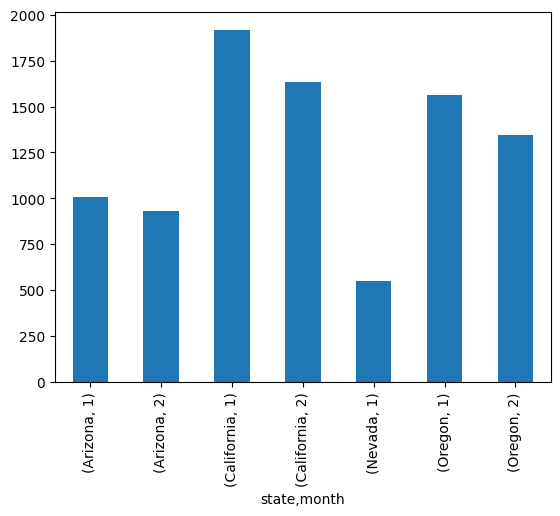

In [19]:
# Display a new DataFrame that contains the number of policies sold by month, by state, for the top 3 states with the highest number of policies sold.

# Group the data
grouped = df.groupby(['state', 'month'])['customer'].count()
print(grouped)

# Filter the data
filtered = grouped[grouped > 500]
print(filtered)

# Plot the data
filtered.plot(kind='bar')
plt.show()


7. The marketing team wants to analyze the effect of different marketing channels on the customer response rate.

Hint: You can use melt to unpivot the data and create a table that shows the customer response rate (those who responded "Yes") by marketing channel.

External Resources for Data Filtering: https://towardsdatascience.com/filtering-data-frames-in-pandas-b570b1f834b9

response  sales_channel
No        Agent            3148
          Branch           2539
          Call Center      1792
          Web              1334
Yes       Agent             742
          Branch            326
          Call Center       221
          Web               177
Name: customer, dtype: int64
sales_channel  Agent  Branch  Call Center   Web
response                                       
No              3148    2539         1792  1334
Yes              742     326          221   177


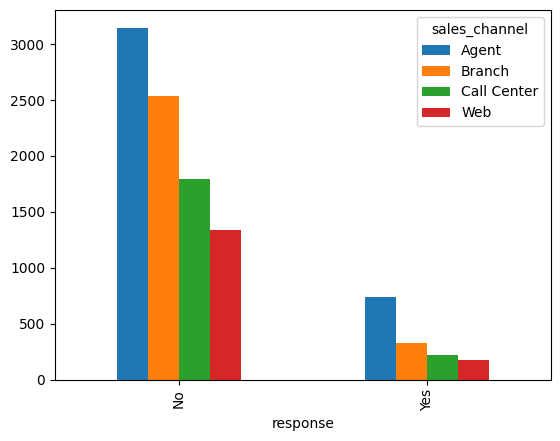

In [21]:
# The marketing team wants to analyze the effect of different marketing channels on the customer response rate.
# You can use melt to unpivot the data and create a table that shows the customer response rate (those who responded "Yes") by marketing channel.

# Group the data
grouped = df.groupby(['response', 'sales_channel'])['customer'].count()
print(grouped)

# Unpivot the data
unpivoted = grouped.unstack()
print(unpivoted)

# Plot the data
unpivoted.plot(kind='bar')

plt.show()